In [1]:
import pandas as pd
import numpy as np

In [10]:
# Read data for the hero 'EarthShaker'
es = pd.read_csv('ES_data.csv', usecols=[0,1,2,3,4,5,6,7,8])

In [11]:
es.head()

,lane,last_hits,denies,gold_per_min,xp_per_min,tower_damage,hero_damage,hero_healing,dmg_dealt
0,1,205,1,407,597,1417,44183,125,44183
1,1,259,17,516,734,2642,43511,0,43511
2,3,197,0,377,498,467,43333,100,43333
3,1,265,2,356,449,367,39514,0,39514
4,1,256,6,405,664,228,39060,0,39060


In [12]:
es.isnull().sum()

lane            0
last_hits       0
denies          0
gold_per_min    0
xp_per_min      0
tower_damage    0
hero_damage     0
hero_healing    0
dmg_dealt       0
dtype: int64

In [87]:
es.shape

(200, 9)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
sns.set_style('darkgrid')
sns.set_context('talk')

In [31]:
# Create a dataframe for the count of games played in different lanes for easier plotting and editing
lane = pd.DataFrame(es['lane'].value_counts()).reset_index()

In [32]:
lane.head()

,index,lane
0,1,92
1,3,82
2,2,23
3,5,3


In [33]:
lane.columns = ['lane', 'game_count']

In [35]:
lane.sort_values('lane', inplace=True)
lane

,lane,game_count
0,1,92
2,2,23
1,3,82
3,5,3


In [36]:
# Replace the numbers in lanes with their actual meaning
lane['lane'].replace({1:'Safe',2:'Mid',3:'Off',5:'Jungle'}, inplace=True)

In [37]:
lane.head()

,lane,game_count
0,Safe,92
2,Mid,23
1,Off,82
3,Jungle,3


[Text(0,0.5,'# Games'), Text(0.5,0,'Lane')]

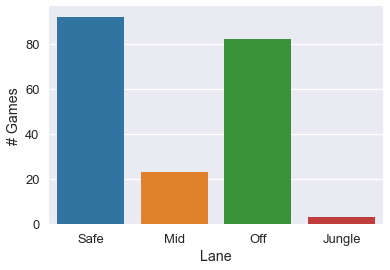

In [51]:
ax = sns.barplot(x='lane',y='game_count',data=lane)
ax.set(xlabel='Lane', ylabel='# Games')

In [ ]:
# Above bar-chart shows that Earthshaker is mostly played in safe-lane and off-lane

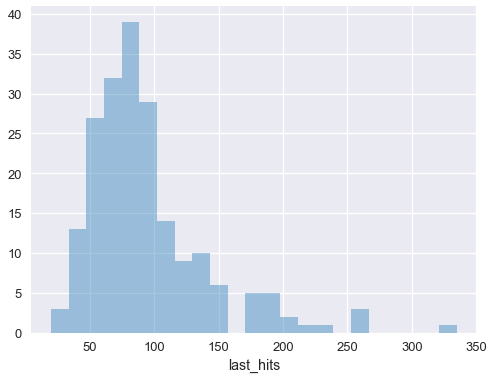

In [79]:
plt.figure(figsize=(8,6))
sns.distplot(es['last_hits'], kde=False)

In [93]:
# Above histogram shows that most earthshaker players have last hits between 50 and 100
# It can also be observed that very small percentage of games had ES's last hits above 250

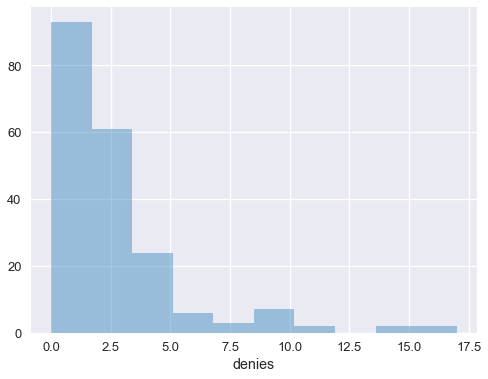

In [86]:
plt.figure(figsize=(8,6))
sns.distplot(es['denies'], kde=False, bins=10)

In [88]:
# Most ES players have denies between 0 and 3

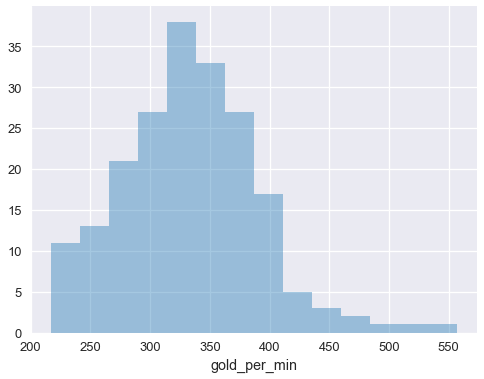

In [92]:
plt.figure(figsize=(8,6))
sns.distplot(es['gold_per_min'], kde=False)

In [94]:
# Above histogram shows that most earthshakers have GPM between 325 and 375 with very few above 500

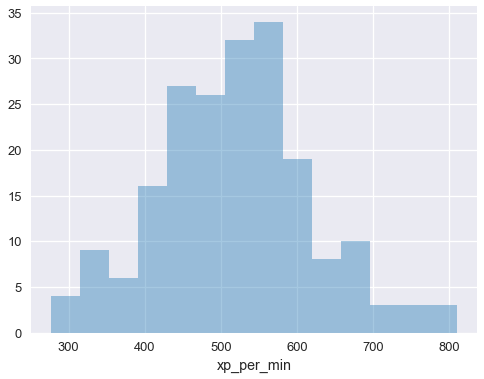

In [97]:
plt.figure(figsize=(8,6))
sns.distplot(es['xp_per_min'], kde=False)

In [98]:
# The distribution of XPM is similar to a normal distribution with majority being between 500 and 600